### Bounded Systems
J M Applegate  
##### CAS543 Complexity Economics

In this course, we'll be talking a lot about systems and I'll often refer to systems being bounded vs unbounded.  
This notebook will walk through what that means.

##### Unbounded Systems
The following code produces a graph showing unbounded growth.  
There is no element in the system that will mitigate this growth, and this is what I mean when I say the system dynamics are unbounded.

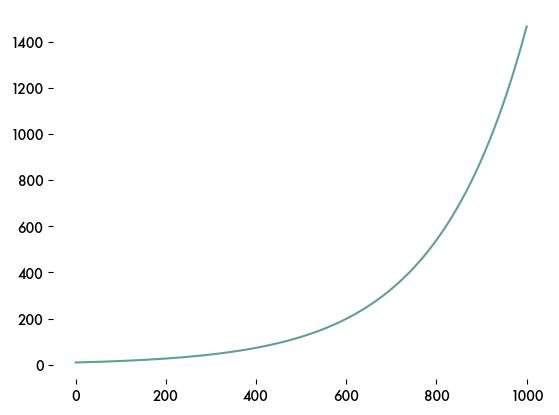

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc('font',**{'family':'sans-serif','sans-serif':['Futura']})

def unbounded(x, beta=.5):
    x_dot = beta * x
    return x_dot

dt = 0.01
num_steps = 1000
xs = np.empty(num_steps + 1)
xs[0] = (10)
for i in range(num_steps):
    x_dot = unbounded(xs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)

t = np.array(range(num_steps + 1))
plt.close()
plt.plot(t, xs, color = 'cadetblue')
sns.despine(left = True, bottom = True)

Of course, very rarely will any system embedded in the natural world be completely unbounded.  
The next set of code explores the dynamics between two species with birth rates and death rates,  
where one species depends on the other for survival, in this case by eating the other.  
Concretely, we will model sheep and grass.  

##### For fixed base resource
gamma = natural death rate  
beta = birth rate  
K_0 = carrying capacity  
c = consumption rate

$$\frac{dp}{dt} = \frac{K}{K_0}\beta p - (1 - \frac{K}{K_0})\gamma p$$
$$\frac{dK}{dt} = -cp$$


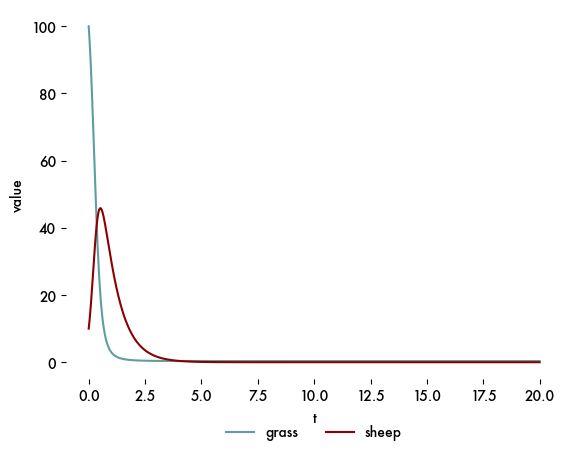

In [3]:
from scipy.integrate import odeint
import pandas as pd

alpha = 1
beta = .1
gamma = 1.5
delta = .75

def dx_dt(x, t):
    s, w = x
    ds_dt = - beta * x[0] * x[1]
    dw_dt = -gamma * x[1] + delta * beta * x[0] * x[1]
    return(ds_dt, dw_dt)

t = np.linspace(0, 20, 1000)     
x_0 = [100, 10]
x = odeint(dx_dt, x_0, t)

xdf = pd.DataFrame((x), columns = ['grass', 'sheep'])
xdf['t'] = t

sns.lineplot(pd.melt(xdf, id_vars=['t']), x = 't', y = 'value', hue = 'variable', palette=['cadetblue', 'darkred'])
plt.legend(frameon = False, ncol = 2, loc='lower center', bbox_to_anchor=(.5, -.2))
sns.despine(left = True, bottom = True)

We see that as the sheep population grows, it exceeds the carrying capacity afforded by grass.  
The results is the extinction of both sheep and grass.  
It would be wise not to treat or design systems that are inherently bounded as if they were unbounded.  
The next set of code will demonstrate such a bounded system.

#### The Lotka-Volterra Model
is a pair of first order, non-linear, differential equations often used to describe the dynamics of biological systems in which two species interact, one a predator and the other its prey. The model was proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926. Considering sheep as the prey and wolves as the predators,  
let $s$ = number of sheep  
$w$ is number of wolves  
$\alpha$ is natural growth rate of sheep  
$\beta$ is death rate of sheep due to wolf predation  
$\gamma$ is natural death rate of wolves  
$\delta$ is how many sheep eaten creates a new wolf.   
The system of equations is
$$\frac{ds}{dt} = \alpha s - \beta s w$$
$$\frac{dw}{dt} = -\gamma w + \delta \beta s w$$

and $x$ is the state vector $[s, w]$ giving sheep and wolf populations.  
The time series plot shows the cyclical changes in the two populations.

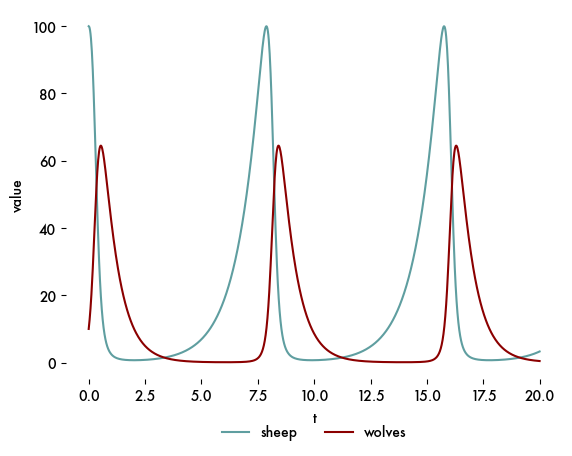

In [19]:
alpha = 1
beta = .1
gamma = 1.5
delta = .75

def dx_dt(x, t):
    s, w = x
    ds_dt = alpha * x[0] -   beta * x[0] * x[1]
    dw_dt = -gamma * x[1] + delta * beta * x[0] * x[1]
    return(ds_dt, dw_dt)

t = np.linspace(0, 20, 1000)    
x_0 = [100, 10]
x = odeint(dx_dt, x_0, t)

xdf = pd.DataFrame((x), columns = ['sheep','wolves'])
xdf['t'] = t

sns.lineplot(pd.melt(xdf, id_vars=['t']), x = 't', y = 'value', hue = 'variable', palette=['cadetblue', 'darkred'])
plt.legend(frameon = False, ncol = 2, loc='lower center', bbox_to_anchor=(.5, -.2))
sns.despine(left = True, bottom = True)

#plt.savefig('LVtimeseries.pdf')

Though sheep and wolf populations vary from high to low, the system demonstrates dynamic stability through self correction.  
This is the behavior that I will refer to as bounded systems.  
Here's another view of the same model, showing the $x$ values over time, which explicitly demonstrates the containing behaviour.  
This is known as a contour plot.

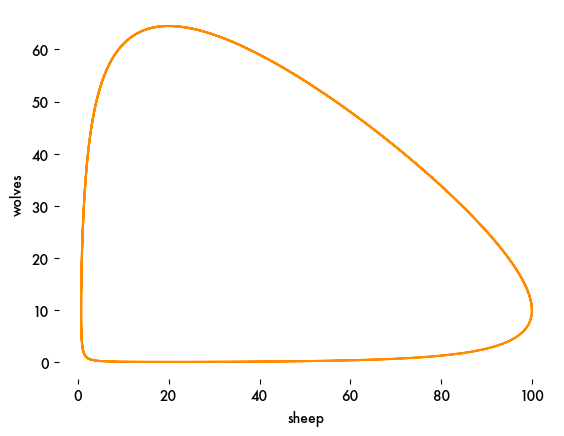

In [17]:
plt.close()
plt.plot(x[:,0], x[:,1], color = 'darkorange')
sns.despine(left = True, bottom = True)
plt.xlabel('sheep')
plt.ylabel('wolves')
plt.show()

The price mechanism is usually considered a self-bounding system,  
where prices and quantities are dynamically adjusted such that oversupply will lower    
prices and an undersupply will raise prices.